In [1]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.plot import show


In [2]:
pre_path = "../data/S1_pre.tif"
post_path = "../data/S1_post.tif"

with rasterio.open(pre_path) as src:
    pre_img = src.read()
    profile = src.profile

with rasterio.open(post_path) as src:
    post_img = src.read()

print("Pre image shape:", pre_img.shape)
print("Post image shape:", post_img.shape)


Pre image shape: (1, 2004, 2225)
Post image shape: (1, 2004, 2225)


In [4]:
# Single-band Sentinel-1 (VH)
VH_pre = pre_img[0]
VH_post = post_img[0]


In [5]:
# Flood-sensitive change feature
delta_VH = VH_post - VH_pre


In [6]:
ratio_placeholder = np.zeros_like(VH_post)


In [7]:
feature_stack = np.stack(
    [
        VH_post,          # Current backscatter
        delta_VH,         # Change detection
        ratio_placeholder # Placeholder
    ],
    axis=-1
)

print("Feature stack shape:", feature_stack.shape)


Feature stack shape: (2004, 2225, 3)


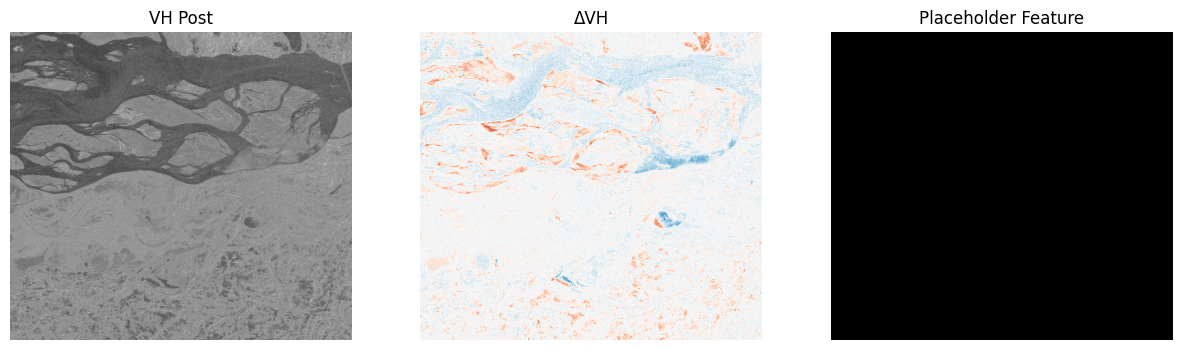

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))

axs[0].imshow(VH_post, cmap="gray")
axs[0].set_title("VH Post")

axs[1].imshow(delta_VH, cmap="RdBu")
axs[1].set_title("ΔVH")

axs[2].imshow(ratio_placeholder, cmap="gray")
axs[2].set_title("Placeholder Feature")

for ax in axs:
    ax.axis("off")

plt.show()


In [9]:
np.save("../data/processed_features.npy", feature_stack)
print("Phase-2 features saved successfully")


Phase-2 features saved successfully
